## Data Science Masters - Hindi - 25 Feb 2023

In [9]:
import pandas as pd
course_name = ["Data Science", "Machine Learning", "Big Data", "Data Engineer"]
duration = [2, 3, 6, 4]
df = pd.DataFrame(data={"course_name": course_name, "duration": duration})

#### Q1. Write a code to print the data present in the second row of the dataframe, df.

In [10]:
df.iloc[1:2]


,course_name,duration
1,Machine Learning,3


#### Q2. What is the difference between the functions loc and iloc in pandas.DataFrame? 

- loc and iloc are both useful for selecting data from a pandas DataFrame.
#
- iloc
    - iloc uses integer positions.
    - When selecting a range of rows, iloc is notinclusive of the endpoint.
#
- loc
    - loc uses labels for the location.
    - When selecting a range of rows, loc is inclusive of the endpoint
#
- For example, df.loc[‘a’:‘c’] will select rows with labels ‘a’, ‘b’ and ‘c’,
- While df.iloc[0:3] will select rows with positions 0, 1 and 2.

#### Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df then find the output for both new_df.loc[2] and new_df.iloc[2].
#### Did you observe any difference in both the outputs? If so then explain it. 

In [11]:
ind = [3, 0, 1, 2]
new_df = pd.DataFrame(df,index=ind)

In [12]:
new_df

,course_name,duration
3,Data Engineer,4
0,Data Science,2
1,Machine Learning,3
2,Big Data,6


In [13]:
print(new_df.loc[2],"\n")
print(new_df.iloc[2])

course_name    Big Data
duration              6
Name: 2, dtype: object 

course_name    Machine Learning
duration                      3
Name: 1, dtype: object


- Here, loc returns the data for the index with label as '2'.
- But the iloc returns the data for the index of location at 2.

In [14]:
import pandas as pd
import numpy as np
columns = ["column_1", "Column_2", "Column_3",
           "Column_4", "Column_5", "Column_6"]
indices = [1, 2, 3, 4, 5, 6]
# creating a dataframe
df1 = pd.DataFrame(np.random.rand(6, 6), columns=columns, index=indices)

#### Q4. Write a code to find the following statistical measurements for the above dataframe df1:

#### (i)  mean of each and every column present in the dataframe.

In [15]:
df1.mean()

column_1    0.432556
Column_2    0.634965
Column_3    0.263582
Column_4    0.210582
Column_5    0.462802
Column_6    0.421951
dtype: float64

#### (ii) standard deviation of column, ‘column_2’  

In [16]:
np.std(df1.iloc[:,1])

0.33844018717931384

#### Q5. Replace the data present in the second row of column, ‘column_2’ by a string variable then find the mean of column, column_2.
#### If you are getting errors in executing it then explain why.
#### [Hint: To replace the data use df1.loc[] and equate this to string data of your choice.]

In [18]:
df1.iloc[1,1] = "Aditya"
# np.mean(df1.iloc[:,1])

- The line 2 will throw error as arithmetic operations are not possible on integers and string values.

#### Q6. What do you understand about the windows function in pandas and list the types of windows functions?

- The window functions in Pandas are used to perform some sort of calculations across a set of rows that are interrelated with the current row.
- The windows functions help us to perform the aggregated calculations across various partitions or cross-sections of the data.
#
- The windows function in pandas are:
    - rolling
    - expanding
    - ewm

#### Q7. Write a code to print only the current month and year at the time of answering this question.
#### [Hint: Use pandas.datetime function]  

In [19]:
from datetime import datetime
import pandas as pd
now = datetime.now()
date = now.strftime("%m %Y")
dt = pd.to_datetime(date)
print("The current month , year is", dt.month, ",", dt.year)

The current month , year is 3 , 2023


#### Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and calculates the difference between them in days, hours, and minutes using Pandas time delta. The program should prompt the user to enter the dates and display the result.

In [20]:
import pandas as pd
d1 = input("Enter the first date in YYYY-MM-DD format")
d2 = input("Enter the first date in YYYY-MM-DD format")

print("Your entered 1st date is", d1)
print("Your entered 2nd date is", d2)

ddf = pd.to_datetime(d1) - pd.to_datetime(d2)
print("The difference between the two dates is", ddf)


Your entered 1st date is 2023-01-03
Your entered 2nd date is 2023-11-19
The difference between the two dates is -320 days +00:00:00


#### Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified column to a categorical data type. The program should prompt the user to enter the file path, column name, and category order, and then display the sorted data.

In [21]:
import pandas as pd

file_path = input("Enter the file path: ")
df = pd.read_csv(file_path)
column_name = input("Enter the column name to convert to categorical data type: ")
category_order = input("Enter the category order (comma-separated list): ").split(",")
df[column_name] = pd.Categorical(df[column_name], categories=category_order, ordered=True)

print(df.sort_values(by=column_name))

    taxonomy_id name parent_id           parent_name
0           101  NaN       NaN                   NaN
1        101-01  NaN       101             Emergency
2        101-02  NaN       101             Emergency
3     101-02-01  NaN    101-02        Emergency Cash
4     101-02-02  NaN    101-02        Emergency Cash
..          ...  ...       ...                   ...
285   111-01-07  NaN    111-01  Advocacy & Legal Aid
286      111-02  NaN       111                 Legal
287      111-03  NaN       111                 Legal
288      111-04  NaN       111                 Legal
289      111-05  NaN       111                 Legal

[290 rows x 4 columns]


#### Q10. Write a Python program that reads a CSV file containing sales data for different products and visualizes the data using a stacked bar chart to show the sales of each product category over time. The program should prompt the user to enter the file path and display the chart.

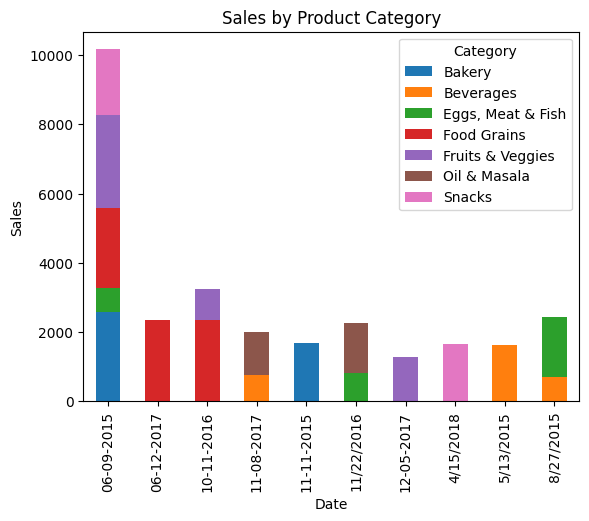

In [34]:
# Dataset - https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset?select=Supermart+Grocery+Sales+-+Retail+Analytics+Dataset.csv

import pandas as pd
from matplotlib import pyplot as plt

file_path = input("Enter the file path: ")
df = pd.read_csv(file_path)
df = df.iloc[:20,:]

sales_by_date = pd.pivot_table(df, index='Order Date', columns='Category', values='Sales', aggfunc=sum)

sales_by_date.plot(kind='bar', stacked=True)

plt.title('Sales by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

#### 11. You are given a CSV file containing student data that includes the student ID and their test score. Write a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, and displays the results in a table.
#
#### The program should do the following:
#
    - Prompt the user to enter the file path of the CSV file containing the student data.
    - Read the CSV file into a Pandas DataFrame.
    - Calculate the mean, median, and mode of the test scores using Pandas tools.
    - Display the mean, median, and mode in a table.
#
#### Assume the CSV file contains the following columns.
    - Student ID: The ID of the student.
    - Test Score: The score of the student's test.
#
#### Example usage of the program:
#### Enter the file path of the CSV file containing the student data: student_data.csv 
#
#### +-----------+--------+
#### | Statistic | Value  |
#### +-----------+--------+
#### | Mean      | 79.6   |
#### | Median    | 82     |
#### | Mode      | 85, 90 |
#### +-----------+--------+
#
#### Assume that the CSV file student_data.csv contains the following data:
#### Student ID,Test Score
#### 1,85
#### 2,90
#### 3,80
#### 4,75
#### 5,85
#### 6,82
#### 7,78
#### 8,85
#### 9,90
#### 10,85
#### The program should calculate the mean, median, and mode of the test scores and display the results in a table.

In [4]:
import pandas as pd

file_path = input("Enter the file path: ")

df = pd.read_csv(file_path)

mean = df['Test Score'].mean()
median = df['Test Score'].median()
mode = df['Test Score'].mode().tolist()

stat = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Value': [mean, median, ', '.join(map(str, mode))]
})

stat

,Statistic,Value
0,Mean,83.5
1,Median,85.0
2,Mode,85
